## Linear Regession

### Profit Estimation of a Company

```text
    Profit --> Expenditure(R&D, Marketing, State, Administration) --> Calculate Profit
    Here we calculate profit based on expenditure.
```

For simplicity, lets consider a single variable (R&D) and find out which companies to invest in.

---

After analysis using **linear regression**, we decide that, "Companies spending more on R&D make good profit. Let's invest in them. 

In [1]:
import matplotlib.pyplot as plt
import math

### Linear Regession using Least Square Method

![images](images/1.png)

In [2]:
# x: independent variable
# x = [1,2,3,4,5]
# y: dependent variable
# y = [1,2,3,4,5]

In [3]:
import pandas as pd

df = pd.read_csv('datasets/archive/Admission_Predict.csv')

df.columns

Index(['Serial No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [4]:
x = df.GRE_Score.values
y = df.Chance_of_Admit

print(len(x), len(y))

400 400


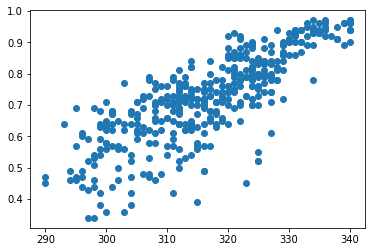

In [5]:
# plot the basic scatter plot
plt.scatter(x, y) # scatter(indepentdent_variable, dependent_variable)

In [6]:
# define cal_mean function
def cal_mean(data_points):
    return sum(data_points) / len(data_points)

In [7]:
x_mean = cal_mean(x)
y_mean = cal_mean(y)

print(x_mean, y_mean)

316.8075 0.7243499999999996


In [8]:
# our equation is y = b0 + b1 * x

# b1 = sum((x - x_mean) (y - y_mean)) / sum((x - x_mean) ** 2)
# b0 = y_mean - (b1 * x_mean)

def cal_b1(data_points, x_mean, y_mean):
    
    total_numerator = 0
    total_denominator = 0
    
    # sum     
    for x, y in data_points:
        # sum((x - x_mean) (y - y_mean))
        total_numerator += (x - x_mean) * (y - y_mean)
        # sum((x - x_mean) ** 2)
        total_denominator += (x - x_mean) ** 2
    
    # sum((x - x_mean) (y - y_mean)) / sum((x - x_mean) ** 2)
    return total_numerator / total_denominator

def cal_b0(b1, x_mean, y_mean):
    # y_mean - (b1 * x_mean)
    return y_mean - (b1 * x_mean)


b1 = cal_b1(zip(x, y), x_mean, y_mean)
b0 = cal_b0(b1, x_mean, y_mean)

In [9]:
print(b0, b1)

-2.436084244851057 0.00997588202568139


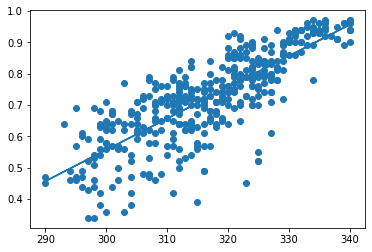

In [10]:
# calculate regession line based on x data points
estimates = [b0 + b1 * data for data in x]

plt.scatter(x, y)
plt.plot(x, estimates)
plt.show()

### Regression Analysis using R Squared

```text
R ~ 1, Least Error!!
R ~ 0, Highest Error!!
```
![images](images/2.png)

In [11]:
def cal_r_square(data_points, estimates, y_mean):
    total_numerator = 0
    total_denominator = 0
    
    for i, y in enumerate(data_points):
        total_numerator += (estimates[i] - y_mean) ** 2
        # estimates[i] -> i'th estimate value 
        total_denominator += (y - y_mean) ** 2 

    return  round(total_numerator / total_denominator, 3)

r_square = cal_r_square(y, estimates, y_mean)
print(r_square)

0.644


### Standard Error of the Estimate

```text
std_error ~ 0, Least Error!
std_error ~ higher, Maximum Error! 
```
![images](images/3.png)

In [12]:
def cal_standard_error_of_estimate(data_points, estimates):
    total = 0
    for i, y in enumerate(data_points):
        total += (estimates[i] - y) ** 2
    return math.sqrt(total / (len(data_points) - 2))

std_error = cal_standard_error_of_estimate(y, estimates)

In [13]:
std_error

0.0851737685329142

## Linear Regression Implementation from Simplilearn

### Import the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [15]:
# importing dataset
companies = pd.read_csv('datasets/1000_Companies.csv')

In [20]:
# show first 5 columns
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
# extracting the independent variable and dependent variable
x = companies.iloc[:, :-1].values # .iloc[row, columns], all rows and all columns except last columns
y = companies.iloc[:, -1].values # last column only

<AxesSubplot:>

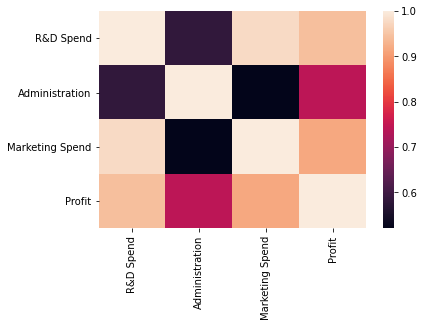

In [35]:
# data visualation
# building the correlation matrix

sns.heatmap(companies.corr())